# Graphing a Simple Line Plot

Python programmers all over the world have already built a lot of **"libraries"** - collections of 
pre-coded functions. To use them, you normally need to install them on your computer first and then import it into your Jupyter Notebook. (Note: Anaconda and Google Colab already has most of the commonly libraries pre-installed). 

In [ ]:
import pandas as pd

Create a 2 dictionary columns, each with 9 data entries. 
- "ecutwfc" is a parameter in the plane-wave basis set used in density functional theory (DFT) calculations. It specifies the kinetic energy cutoff of the wavefunctions in the calculation, which determines the number of plane waves used to describe the electronic wavefunction in the system being studied. A higher value of ecutwfc generally results in a more accurate calculation, but also requires more computational resources. The appropriate value of ecutwfc depends on the specific system being studied and the level of accuracy desired.
- "Total energy (Ry)" is the total energy of a system in a DFT calculation. It is calculated self-consistently using the Kohn-Sham equations. The calculated value depends on various parameters including ecutwfc.

Similar to MATLAB, you can create a data array, in this case, a dict variable with the column labelled "ecutwfc" and "total energy (Ry)." 

In [ ]:
# 
data = {"ecutwfc":[12, 14, 16, 18, 20, 22, 24, 26, 28], 
        "total energy (Ry)":[-15.72103297, -15.73286882, -15.73805663, -15.73997748, -15.74073755, -15.74104964, -15.74118467, -15.74124723, -15.74128342]}

#
display(data)

{'ecutwfc': [12, 14, 16, 18, 20, 22, 24, 26, 28],
 'total energy (Ry)': [-15.72103297,
  -15.73286882,
  -15.73805663,
  -15.73997748,
  -15.74073755,
  -15.74104964,
  -15.74118467,
  -15.74124723,
  -15.74128342]}

Even though the dict variable "data" has the information we need, we can improve the readability of the variable by creating a Pandas Dataframe from the data. 

Pandas is an open-source data manipulation library for Python. It provides tools for handling structured data and improve the readability by adding labels and indexes to each row and column. 

The most powerful feature of Pandas is its ability to load and write data, data manipulation and transformation. 

More information on Pandas Dataframe can be found here: https://pandas.pydata.org/docs/reference/frame.html

In [ ]:
#
Convergence = pd.DataFrame(data)

#
display(Convergence)

,ecutwfc,total energy (Ry)
0,12,-15.721033
1,14,-15.732869
2,16,-15.738057
3,18,-15.739977
4,20,-15.740738
5,22,-15.741050
6,24,-15.741185
7,26,-15.741247
8,28,-15.741283


Similarly to MATLAB, plotting with Python is often done using the Matplotlib library. 

To save memory, we import a specific collection within matplotlib called pyplot that contains all we need to create a simple plot of the total energy vs. the cut off energy (ecutwfc). 

More information on Matplotlib pyplot can be found here: https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

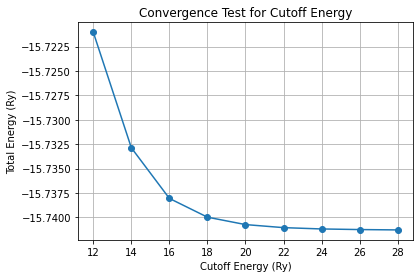

In [ ]:
import matplotlib.pyplot as plt

#
plt.plot(Convergence['ecutwfc'], Convergence['total energy (Ry)'], marker='o')

#
plt.title('Convergence Test for Cutoff Energy')
plt.xlabel('Cutoff Energy (Ry)')
plt.ylabel('Total Energy (Ry)')

#
plt.grid(True)

#
plt.show()

Usually, it is desire to make your plot stands out. To do this, we will recreate the above plot using Seaborn  

Seaborn is a Python data visualization library based on Matplotlib with higher-level interface for creating informative and attractive statistical graphics.

More information about Seaborn can be found here: https://seaborn.pydata.org/examples/index.html

Text(0, 0.5, 'Total Energy (Ry)')

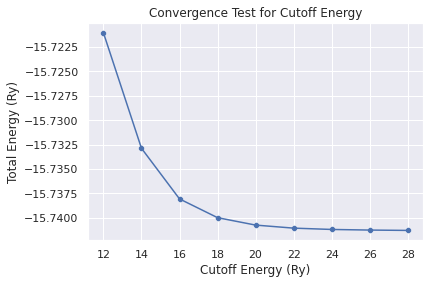

In [ ]:
import seaborn as sns

#
sns.set_theme(style="darkgrid")

#
sns.scatterplot(x="ecutwfc", y="total energy (Ry)",
                data=Convergence, edgecolor = "white")

#
sns.lineplot(x="ecutwfc", y="total energy (Ry)",
                data=Convergence)

#
plt.title('Convergence Test for Cutoff Energy')
plt.xlabel('Cutoff Energy (Ry)')
plt.ylabel('Total Energy (Ry)')

# Import data file and simple data processing

To upload a saved data file, there are many ways, one way we will show here is to use the built-in function in Numpy called loadtxt to first load our data file, and then use Pandas Dataframe to format the data and add column labels.

Numpy is a Python library for scientific computing and data analysis. Because Numpy is built on C, it is very fast and memory efficient. 

More information about Numpy can be found here: https://numpy.org/doc/stable/reference/arrays.html#


In [ ]:
import numpy as np

#
PTypeZnO_df = pd.DataFrame(np.loadtxt('RbZn2O_dos.dat' ), columns=['E (eV)','dos (E)', 'Int dos (E)'])

#
display(PTypeZnO_df)

,E (eV),dos (E),Int dos (E)
0,-2.0,2.242000e+01,2.242
1,-1.9,1.015000e+01,3.256
2,-1.8,1.768000e+00,3.433
3,-1.7,1.163000e-01,3.445
4,-1.6,2.792000e-03,3.445
...,...,...,...
196,17.6,4.453000e-84,699.400
197,17.7,4.453000e-84,699.400
198,17.8,4.453000e-84,699.400
199,17.9,4.453000e-84,699.400


You can use np.mean and np.std to find the mean and the standard deviation of the 'E (eV)' data column

In [ ]:
#
mean_E = np.mean(PTypeZnO_df['E (eV)'])

#
std_E = np.std(PTypeZnO_df['E (eV)'])

#
print('mean of E (eV) = ', mean_E)
print('standard deviation of E (eV) = ', std_E)

mean of E (eV) =  8.0
standard deviation of E (eV) =  5.802298395176403


Create a new dataframe and normalize the column 'E (eV)' by subtracting each values by the mean and dividing it by the standard deviation. The new data is saved as a new column called 'norm E (eV)' 


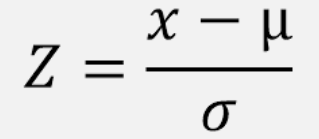

In [ ]:
# 
df_PType_scaled = PTypeZnO_df.copy()
  
# 
df_PType_scaled['norm E (eV)'] = (df_PType_scaled['E (eV)'] - mean_E) / std_E
  
#
display(df_PType_scaled)

,E (eV),dos (E),Int dos (E),norm E (eV)
0,-2.0,2.242000e+01,2.242,-1.723455
1,-1.9,1.015000e+01,3.256,-1.706220
2,-1.8,1.768000e+00,3.433,-1.688986
3,-1.7,1.163000e-01,3.445,-1.671751
4,-1.6,2.792000e-03,3.445,-1.654517
...,...,...,...,...
196,17.6,4.453000e-84,699.400,1.654517
197,17.7,4.453000e-84,699.400,1.671751
198,17.8,4.453000e-84,699.400,1.688986
199,17.9,4.453000e-84,699.400,1.706220


# Practice

- In 10 minutes, fill in the comment sign "_#_" yourself on what each line or each section does.

Text(10.5, 195, '$\\mu=8.00$ eV\n$\\sigma=5.80$ eV')

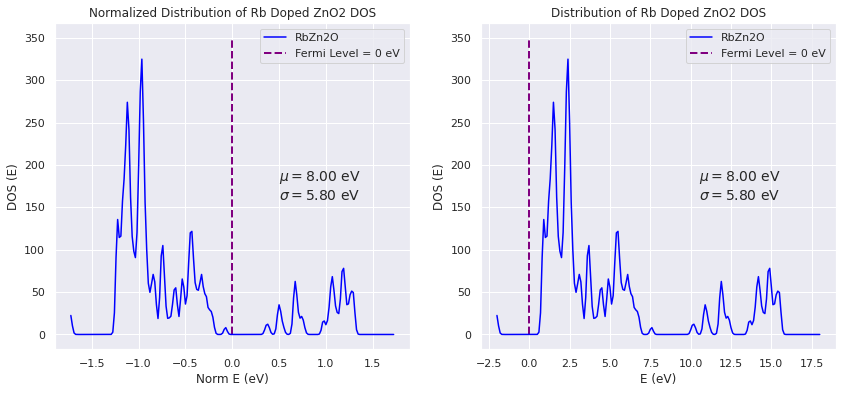

In [ ]:
#
fig, axes = plt.subplots(1, 2, sharey=False, figsize=(14,6))

#
sns.set_theme(style="darkgrid")

#
axes[0].set_title("Normalized Distribution of Rb Doped ZnO2 DOS")
axes[0].set_xlabel("Norm E (eV)")
axes[0].set_ylabel("DOS (E)")

#
axes[0].vlines(x=0, ymin=0, ymax=350, colors='purple', ls='--', lw=2, label='Fermi Level = 0 eV', )

#
sns.lineplot(data = df_PType_scaled, x='norm E (eV)', y = 'dos (E)', color='blue', label='RbZn2O', ax = axes[0])

#
axes[0].legend(loc='upper right')

#
axes[1].set_title("Distribution of Rb Doped ZnO2 DOS")
axes[1].set_xlabel("E (eV)")
axes[1].set_ylabel("DOS (E)")

#
axes[1].vlines(x=0, ymin=0, ymax=350, colors='purple', ls='--', lw=2, label='Fermi Level = 0 eV', )

#
sns.lineplot(data = df_PType_scaled, x='E (eV)', y = 'dos (E)', color='blue', label='RbZn2O', ax = axes[1])

#
axes[1].legend(loc='upper right')

#
mu = mean_E
sigma = std_E

#
textstr = '\n'.join((r'$\mu=%.2f$ eV' % (mu, ), r'$\sigma=%.2f$ eV' % (sigma, )))
axes[0].text(0.5, 195, textstr, fontsize=14, verticalalignment='top')
axes[1].text(10.5, 195, textstr, fontsize=14, verticalalignment='top')